<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Analise_Oleo_producao_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                **Análise de Óleo**

Para efetuar os cálculos das análises dos laudos os seguintes passos deverão ser executados:

 

---



1.   Digitar o caminho da pasta a ser analisada entre aspas em **pasta_planilha**
2.   Digitar o nome da planilha a ser analisada entre aspas em **nome_planilha**
1.   Digitar o caminho da pasta entre aspas onde o resultado será gravado em **pasta_resultado**
2.   Digitar o nome da planilha do resultado entre aspas em **nome_resultado**
1.   Digitar o caminho entre aspas do modelo que será utilizado para previsão em **pasta_planilha**
1.   Clicar na seta (play) da célula de endereços e nomes
1.   Clicar na seta (play) da célula do algoritmo

2.   Aguardar a finalização da execução / mensagem de conclusão da gravação do resultado





---
**Definições de taxas e limites** 


---


 
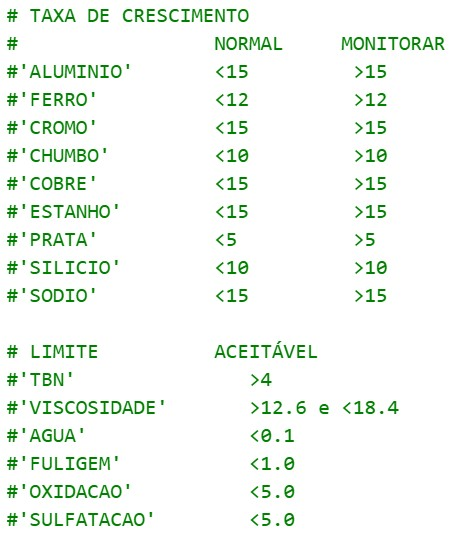

In [5]:
pasta_planilha = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/"
nome_planilha = "bd_teste.xlsx"
pasta_resultado = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/"
nome_resultado = "resultado_teste.xlsx"
path_modelo = "/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/model_2cl.pkl"

## **Clicar na seta abaixo para executar o algoritmo**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from termcolor import colored
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split, \
#GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold
#from sklearn.feature_selection import VarianceThreshold, SelectKBest
#from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, \
roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay, auc, make_scorer, recall_score, \
accuracy_score, precision_score, f1_score, average_precision_score
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#import qgrid
import numpy as np
from matplotlib import cm
import pickle

caminho1= pasta_planilha + nome_planilha
bd_teste = pd.read_excel(caminho1)
nome = "bd_teste.csv"
caminho2 = pasta_planilha + nome
bd_teste.to_csv(caminho2,index=False)
bd_teste = pd.read_csv(caminho2,sep=',',encoding = 'utf8') 
#bd_teste.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.csv",index = False)
#bd_teste = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.csv",sep = ',',encoding = 'utf8')

bd_teste['DIESEL'] = bd_teste['DIESEL'].apply({'N':0, 'S':1,'NN':0,'< 1':0,'<1':0,'> 10':1,'>10':1}.get)
bd_teste['DIESEL'] = bd_teste['DIESEL'].replace(r'^\s+$', np.nan, regex=True)
bd_teste = bd_teste.fillna({'DIESEL': 0})

for x in range (bd_teste.shape[0]):
  if bd_teste['TBN'][x]=='-':
    bd_teste['TBN'][x]= 0

bd_teste['TBN']=bd_teste['TBN'].astype(str).str.replace("," , ".").astype(float)
media = bd_teste['TBN'].mean()
bd_teste = bd_teste.fillna({'TBN': media})

for x in range (bd_teste.shape[0]):
  if bd_teste['VISCOSIDADE'][x]=='-':
    bd_teste['VISCOSIDADE'][x]= 0 

bd_teste['VISCOSIDADE']=bd_teste['VISCOSIDADE'].astype(str).str.replace("," , ".").astype(float)
media = bd_teste['VISCOSIDADE'].mean()
bd_teste = bd_teste.fillna({'VISCOSIDADE': media})

for x in range (bd_teste.shape[0]):
  if bd_teste['ALUMINIO'][x]=='-':
    bd_teste['ALUMINIO'][x]= 0
    cont1=cont1+1
  if bd_teste['FERRO'][x]=='-':
    bd_teste['FERRO'][x]= 0
    cont2=cont2+1  
  if bd_teste['CROMO'][x]=='-':
    bd_teste['CROMO'][x]= 0
    cont3=cont3+1
  if bd_teste['CHUMBO'][x]=='-':
    bd_teste['CHUMBO'][x]= 0
    cont4=cont4+1
  if bd_teste['COBRE'][x]=='-':
    bd_teste['COBRE'][x]= 0
    cont5=cont5+1
  if bd_teste['ESTANHO'][x]=='-':
    bd_teste['ESTANHO'][x]= 0
    cont6=cont6+1
  if bd_teste['NIQUEL'][x]=='-':
    bd_teste['NIQUEL'][x]= 0
    cont7=cont7+1
  if bd_teste['PRATA'][x]=='-':
    bd_teste['PRATA'][x]= 0
    cont8=cont8+1  
  if bd_teste['SILICIO'][x]=='-':
    bd_teste['SILICIO'][x]= 0
    cont9=cont9+1
  if bd_teste['SODIO'][x]=='-':
    bd_teste['SODIO'][x]= 0
    cont10=cont10+1
  if bd_teste['AGUA'][x]=='-':
    bd_teste['AGUA'][x]= 0
    cont11=cont11+1
  if bd_teste['FULIGEM'][x]=='-':
    bd_teste['FULIGEM'][x]= 0
    cont12=cont12+1
  if bd_teste['OXIDACAO'][x]=='-':
    bd_teste['OXIDACAO'][x]= 0
    cont13=cont13+1
  if bd_teste['SULFATACAO'][x]=='-':
    bd_teste['SULFATACAO'][x]= 0
    cont14=cont14+1     

bd_teste['ALUMINIO'] = bd_teste['ALUMINIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['FERRO'] = bd_teste['FERRO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['CROMO'] = bd_teste['CROMO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['CHUMBO'] = bd_teste['CHUMBO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['COBRE'] = bd_teste['COBRE'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['ESTANHO'] = bd_teste['ESTANHO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['NIQUEL'] = bd_teste['NIQUEL'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['PRATA'] = bd_teste['PRATA'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SILICIO'] = bd_teste['SILICIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SODIO'] = bd_teste['SODIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['AGUA'] = bd_teste['AGUA'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['FULIGEM'] = bd_teste['FULIGEM'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['OXIDACAO'] = bd_teste['OXIDACAO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SULFATACAO'] = bd_teste['SULFATACAO'].replace(r'^\s+$', np.nan, regex=True)

bd_teste['ALUMINIO']=bd_teste['ALUMINIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['FERRO']=bd_teste['FERRO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['CROMO']=bd_teste['CROMO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['CHUMBO']=bd_teste['CHUMBO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['COBRE']=bd_teste['COBRE'].astype(str).str.replace("," , ".").astype(float)
bd_teste['ESTANHO']=bd_teste['ESTANHO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['NIQUEL']=bd_teste['NIQUEL'].astype(str).str.replace("," , ".").astype(float)
bd_teste['PRATA']=bd_teste['PRATA'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SILICIO']=bd_teste['SILICIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SODIO']=bd_teste['SODIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['AGUA']=bd_teste['AGUA'].astype(str).str.replace("," , ".").astype(float)
bd_teste['FULIGEM']=bd_teste['FULIGEM'].astype(str).str.replace("," , ".").astype(float)
bd_teste['OXIDACAO']=bd_teste['OXIDACAO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SULFATACAO']=bd_teste['SULFATACAO'].astype(str).str.replace("," , ".").astype(float)

media = bd_teste['ALUMINIO'].mean()
bd_teste = bd_teste.fillna({'ALUMINIO': media})
media = bd_teste['FERRO'].mean()
bd_teste = bd_teste.fillna({'FERRO': media})
media = bd_teste['CROMO'].mean()
bd_teste = bd_teste.fillna({'CROMO': media})
media = bd_teste['CHUMBO'].mean()
bd_teste = bd_teste.fillna({'CHUMBO': media})
media = bd_teste['COBRE'].mean()
bd_teste = bd_teste.fillna({'COBRE': media})
media = bd_teste['ESTANHO'].mean()
bd_teste = bd_teste.fillna({'ESTANHO': media})
media = bd_teste['NIQUEL'].mean()
bd_teste = bd_teste.fillna({'NIQUEL': media})
media = bd_teste['PRATA'].mean()
bd_teste = bd_teste.fillna({'PRATA': media})
media = bd_teste['SILICIO'].mean()
bd_teste = bd_teste.fillna({'SILICIO': media})
media = bd_teste['SODIO'].mean()
bd_teste = bd_teste.fillna({'SODIO': media})
media = bd_teste['AGUA'].mean()
bd_teste = bd_teste.fillna({'AGUA': media})
media = bd_teste['FULIGEM'].mean()
bd_teste = bd_teste.fillna({'FULIGEM': media})
media = bd_teste['OXIDACAO'].mean()
bd_teste = bd_teste.fillna({'OXIDACAO': media})
media = bd_teste['SULFATACAO'].mean()
bd_teste = bd_teste.fillna({'SULFATACAO': media})

colunas=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
        'TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN','TARGET']

valores = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bd_teste_corr = bd_teste.reindex(columns=bd_teste.columns.tolist() + colunas)   # add empty cols
bd_teste_corr[colunas] = valores  # multi-column assignment works for existing cols 

bd_teste_corr = bd_teste_corr[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN','TARGET']]

analise_orig = bd_teste_corr

analise_orig['TX_ALUMINIO'] = analise_orig['TX_ALUMINIO'].astype(float)
analise_orig['TX_FERRO'] = analise_orig['TX_FERRO'].astype(float)
analise_orig['TX_CROMO'] = analise_orig['TX_CROMO'].astype(float)
analise_orig['TX_CHUMBO'] = analise_orig['TX_CHUMBO'].astype(float)
analise_orig['TX_COBRE'] = analise_orig['TX_COBRE'].astype(float)
analise_orig['TX_ESTANHO'] = analise_orig['TX_ESTANHO'].astype(float)
analise_orig['TX_PRATA'] = analise_orig['TX_PRATA'].astype(float)
analise_orig['TX_SILICIO'] = analise_orig['TX_SILICIO'].astype(float)
analise_orig['TX_SODIO'] = analise_orig['TX_SODIO'].astype(float)
analise_orig['LIM_DIESEL'] = analise_orig['LIM_DIESEL'].astype(float)
analise_orig['LIM_VISCOSIDADE'] = analise_orig['LIM_VISCOSIDADE'].astype(float)
analise_orig['LIM_AGUA'] = analise_orig['LIM_AGUA'].astype(float)
analise_orig['LIM_TBN'] = analise_orig['LIM_TBN'].astype(float)
analise_orig['LIM_FULIGEM'] = analise_orig['LIM_FULIGEM'].astype(float)
analise_orig['LIM_OXIDACAO'] = analise_orig['LIM_OXIDACAO'].astype(float)
analise_orig['LIM_SULFATACAO'] = analise_orig['LIM_SULFATACAO'].astype(float)

analise_orig['DT_COLETA']= pd.to_datetime(analise_orig['DT_COLETA'])
analise_orig=analise_orig.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)
analise_orig = analise_orig.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO')

analise_orig1 = analise_orig.apply(lambda x: x) 

colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO'] 

cont = 0
anterior = 0
#a = analise_orig1.shape[0] 
a = bd_teste.shape[0]
analise_orig1['LOCO_analise'] = analise_orig1['LOCO_analise'].apply(str)
analise_orig1['DT_COLETA']= pd.to_datetime(analise_orig1['DT_COLETA'])


for i in range(a):
  loco = analise_orig1['LOCO_analise'][i] 
  values=[loco]
  filtered_df = analise_orig1[analise_orig1.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 4:
    
    if loco == anterior:
      cont = cont + 1
    if loco != anterior:
      cont = 0 

     
    if (4+cont)<filtered_df.shape[0] and filtered_df.iloc[[4+cont]]['LOCO_analise'].values[0]==loco :
      
      dt_menor=filtered_df.iloc[[4+cont]]['DT_COLETA'].values[0] 
      dt_maior=filtered_df.iloc[[cont]]['DT_COLETA'].values[0]
      oneday = pd.Timedelta(days=1)
     
      dias = (abs((dt_maior - dt_menor)))/oneday
        
      
      for k in range (len(colunas_TX)):
        tx = filtered_df.iloc[[cont]][colunas_FEAT[k]].values[0]-filtered_df.iloc[[4+cont]][colunas_FEAT[k]].values[0]
        analise_orig1[colunas_TX[k]][i] = round((tx/(dias+1)),5)

    analise_orig1['LIM_DIESEL'][i]= analise_orig1['DIESEL'][i]
    analise_orig1['LIM_VISCOSIDADE'][i]= analise_orig1['VISCOSIDADE'][i]
    analise_orig1['LIM_AGUA'][i]= analise_orig1['AGUA'][i]
    analise_orig1['LIM_FULIGEM'][i]= analise_orig1['FULIGEM'][i]
    analise_orig1['LIM_OXIDACAO'][i]= analise_orig1['OXIDACAO'][i]
    analise_orig1['LIM_SULFATACAO'][i]= analise_orig1['SULFATACAO'][i]
    analise_orig1['LIM_TBN'][i]= analise_orig1['TBN'][i] 

    anterior = loco

    #analise_orig1_1 = analise_orig1



analise_orig1_1 = analise_orig1
#NORMAL           MONITORAR   
#<15         >15   <45    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']

#'TX_FERRO','TX_CHUMBO','TX_PRATA'
    
cont = 0        

for x in range(len(analise_orig1_1)):
#for x in range(10):  
  
  for k in range (len(colunas_TX_COMUNS)):
    cont = 0
    #print('linha ',x)
    #print('n.coluna k ',k)
    #print( ' coluna ',colunas_TX_COMUNS[k])
    #print(' valor ',analise_orig1_1[colunas_TX_COMUNS[k]][x])
    if analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.15 and cont == 0:
      #print (' valor ', 1)
      analise_orig1_1[colunas_TX_COMUNS[k]][x] = 1
      cont = 1
      
    else:  
      if 0.15 <= analise_orig1_1[colunas_TX_COMUNS[k]][x] < 0.45 and cont == 0:
        #print (' valor ', 2)
        analise_orig1_1[colunas_TX_COMUNS[k]][x] = 2
        cont = 1
        
      else:
        if analise_orig1_1[colunas_TX_COMUNS[k]][x] >=0.45 and cont == 0:
          #print (' valor ', 2)
          analise_orig1_1[colunas_TX_COMUNS[k]][x] = 2
           
        
  cont = 0   
  if analise_orig1_1['TX_FERRO'][x] < 0.12 and cont == 0:
    analise_orig1_1['TX_FERRO'][x]= 1
    cont = 1
   
  else:  
    if 0.12 <= analise_orig1_1['TX_FERRO'][x] < 0.45 and cont == 0:
      analise_orig1_1['TX_FERRO'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_FERRO'][x] >= 0.45 and cont == 0:
        analise_orig1_1['TX_FERRO'][x]= 2
        #print('Ferro valor 2')
          
  #print('results 2',results)
  cont = 0
  if analise_orig1_1['TX_CHUMBO'][x] < 0.10 and cont == 0:
    analise_orig1_1['TX_CHUMBO'][x]= 1
    cont = 1
    
  else:  
    if 0.10 <= analise_orig1_1['TX_CHUMBO'][x] < 0.30 and cont == 0:
      analise_orig1_1['TX_CHUMBO'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_CHUMBO'][x] >= 0.30 and cont == 0:
        analise_orig1_1['TX_CHUMBO'][x]= 2
         
  cont = 0       
  #print('results 3',results)
  if analise_orig1_1['TX_PRATA'][x] < 0.05 and cont == 0:
    analise_orig1_1['TX_PRATA'][x]= 1
    cont = 1
    
  else:  
    if 0.05 <= analise_orig1_1['TX_PRATA'][x] < 0.15 and cont == 0:
      analise_orig1_1['TX_PRATA'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_PRATA'][x] >= 0.15 and cont == 0:
        analise_orig1_1['TX_PRATA'][x]= 2
          
  #print('results 4',results)
  cont = 0
  if analise_orig1_1['TX_SILICIO'][x] < 0.10 and cont == 0:
    analise_orig1_1['TX_SILICIO'][x]= 1
    cont = 1
    
  else:  
    if 0.10 <= analise_orig1_1['TX_SILICIO'][x] < 0.15 and cont == 0:
      analise_orig1_1['TX_SILICIO'][x]= 2
      cont = 1
      
    else:  
      if analise_orig1_1['TX_SILICIO'][x] >= 0.15 and cont == 0:
        analise_orig1_1['TX_SILICIO'][x]= 2
       
  #print('results 5',results)   
  cont = 0
  if analise_orig1_1['LIM_TBN'][x] < 4 and cont == 0:
    analise_orig1_1['LIM_TBN'][x]= 2
    cont = 1
     
  if analise_orig1_1['LIM_TBN'][x] > 4 and cont == 0:
    analise_orig1_1['LIM_TBN'][x]= 1
    
  cont = 0  
  if analise_orig1_1['LIM_VISCOSIDADE'][x] < 12.6 and cont == 0:
    analise_orig1_1['LIM_VISCOSIDADE'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_VISCOSIDADE'][x] > 12.6 and cont == 0:
    analise_orig1_1['LIM_VISCOSIDADE'][x]= 1
     
  cont = 0  
  if analise_orig1_1['LIM_AGUA'][x] > 0.1 and cont == 0:
    analise_orig1_1['LIM_AGUA'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_AGUA'][x] < 0.1 and cont == 0:
    analise_orig1_1['LIM_AGUA'][x]= 1
      
  cont = 0  
  if analise_orig1_1['LIM_FULIGEM'][x] > 1 and cont == 0:
    analise_orig1_1['LIM_FULIGEM'][x]= 2
    #print('Fuligem valor 2')
    cont = 1
    
  if analise_orig1_1['LIM_FULIGEM'][x] < 1 and cont == 0:
    analise_orig1_1['LIM_FULIGEM'][x]= 1
    #print('Fuligem valor 1')
      
  cont = 0  
  if analise_orig1_1['LIM_OXIDACAO'][x] > 5 and cont == 0:
    analise_orig1_1['LIM_OXIDACAO'][x]= 2
    cont = 1
    
  if analise_orig1_1['LIM_OXIDACAO'][x] < 5 and cont == 0:
    analise_orig1_1['LIM_OXIDACAO'][x]= 1
      
  cont = 0  
  if analise_orig1_1['LIM_SULFATACAO'][x] > 5 and cont == 0:
    analise_orig1_1['LIM_SULFATACAO'][x]= 2
    cont = 1
     
  if analise_orig1_1['LIM_SULFATACAO'][x] < 5 and cont == 0:
    analise_orig1_1['LIM_SULFATACAO'][x]= 1
      
  analise_orig1_1['LIM_DIESEL'][x] = 1
  #print('results 6',results)  
  cont = 0

nome_resultado1 = 'testexxx.xlsx'
caminho3 = pasta_resultado + nome_resultado1
analise_orig1_1.to_excel(caminho3,index=False)

v1_v2_dataset = analise_orig1_1

v1_v2_dataset['TARGET'] = v1_v2_dataset.apply(lambda row: 1 if (row['TX_ALUMINIO'] == 2) or 
                                                               (row['TX_FERRO'] == 2) or
                                                               (row['TX_CROMO'] == 2) or 
                                                               (row['TX_CHUMBO'] == 2) or
                                                               (row['TX_COBRE'] == 2) or 
                                                               (row['TX_ESTANHO'] == 2) or
                                                               (row['TX_PRATA'] == 2) or 
                                                               (row['TX_SILICIO'] == 2) or
                                                               (row['TX_SODIO'] == 2) or 
                                                               (row['LIM_DIESEL'] == 2) or
                                                               (row['LIM_VISCOSIDADE'] == 2) or 
                                                               (row['LIM_AGUA'] == 2) or
                                                               (row['LIM_FULIGEM'] == 2) or 
                                                               (row['LIM_OXIDACAO'] == 2) or
                                                               (row['LIM_SULFATACAO'] == 2) or 
                                                               (row['LIM_TBN'] == 2) else 0, axis = 1)




  
v1_v2_dataset['TX_ALUMINIO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_ALUMINIO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_FERRO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_FERRO'] == 1)  else 'NOK',axis =1)                                                   
v1_v2_dataset['TX_CROMO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_CROMO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_CHUMBO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_CHUMBO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_COBRE'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_COBRE'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_ESTANHO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_ESTANHO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_PRATA'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_PRATA'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_SILICIO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_SILICIO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['TX_SODIO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['TX_SODIO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_DIESEL'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_DIESEL'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_VISCOSIDADE'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_VISCOSIDADE'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_AGUA'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_AGUA'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_FULIGEM'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_FULIGEM'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_OXIDACAO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_OXIDACAO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_SULFATACAO'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_SULFATACAO'] == 1)  else 'NOK',axis =1)
v1_v2_dataset['LIM_TBN'] = v1_v2_dataset.apply(lambda row: 'OK' if (row['LIM_TBN'] == 1)  else 'NOK',axis =1)



# Carrega modelo
model_2cl = pickle.load(open(path_modelo, "rb"))
clf = model_2cl

colunas = ['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE','TBN','FULIGEM','OXIDACAO','SULFATACAO']

testy_2 = v1_v2_dataset['TARGET']
testX_2 = v1_v2_dataset[colunas]

cutoff_point = 0.65

preds = clf.predict_proba(testX_2)

prediction_threshold = cutoff_point
preds = clf.predict_proba(testX_2)

predictions = pd.DataFrame({"Probabilidade de Predição": np.round(preds[:, 1], 3)})#, 
                            #"Resultado da Predição": np.where(preds[:, 1] > prediction_threshold, 1, 0)})


predictions_2 = pd.concat([v1_v2_dataset, predictions], axis = 1)

predictions_2['TARGET'] = predictions_2.apply(lambda row: 'NORMAL' if (row['TARGET'] == 0)  else 'MONITORAR',axis =1)


caminho2 = pasta_resultado + nome_resultado
predictions_2.to_excel(caminho2,index=False)
print('')
print('')


print(colored('=====>       A Planilha:      <===== ', 'green', attrs=['bold']))
print(colored(nome_resultado, 'red', attrs=['bold']))
print(colored('=====> Está Gravada na Pasta! <===== ', 'green', attrs=['bold']))


#print('=====> A Planilha: ',nome_resultado,'Está Gravada na Pasta! <=====')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_lau



=====> A Planilha: <===== 
resultado_teste.xlsx
=====> Está Gravada na Pasta! <===== 
